**Objective**

You are working as a data scientist in a
global finance company. Over the
years, the company has collected basic
bank details and gathered a lot of
credit-related information. The
management wants to build an
intelligent system to segregate the
people into credit score brackets to
reduce the manual efforts. Given a
person’s credit-related information,
build a machine learning model that
can classify the credit score.


**Dataset Information**

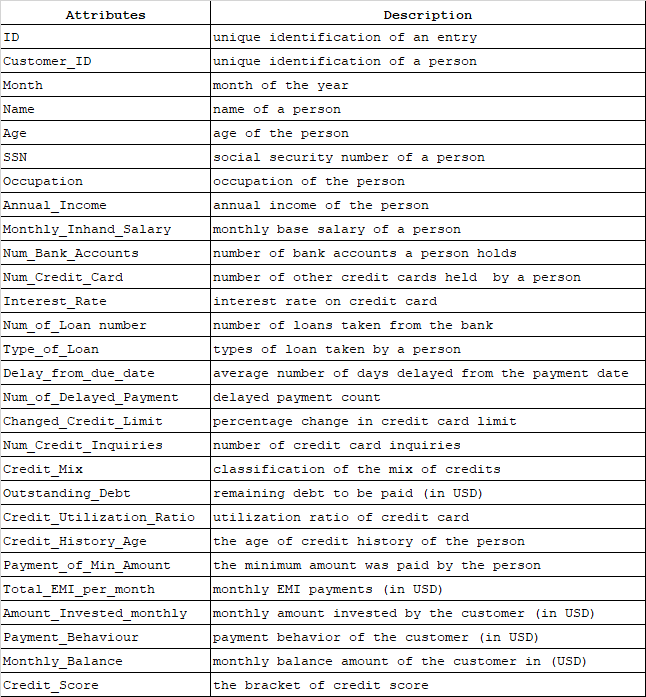




In [1]:
#mounting the drive to load the dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = '/content/drive/MyDrive/ML Projects/Credit Score/credit_score.csv'
df = pd.read_csv(file_path)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [4]:
df.shape

(100000, 28)

In [5]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
#checking the null values in each column

df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
#removing the irrelavant columns
df.drop(columns = ['ID', 'Customer_ID' , 'Name' , 'SSN' , 'Type_of_Loan', 'Credit_History_Age'], inplace = True)

In [9]:
#now checking the parameters
df.shape

(100000, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [11]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [12]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


DATA CLEANING PROCESS

In [13]:
#checking the age range and plotting it on the graph
df['Age'] = df['Age'].str.replace('_','')

#converting the data type of age column
df['Age'] = df['Age'].astype(int)

In [14]:
df.Age.unique()

array([  23, -500,   28, ..., 4808, 2263, 1342])

In [15]:
df.Age.describe()

count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

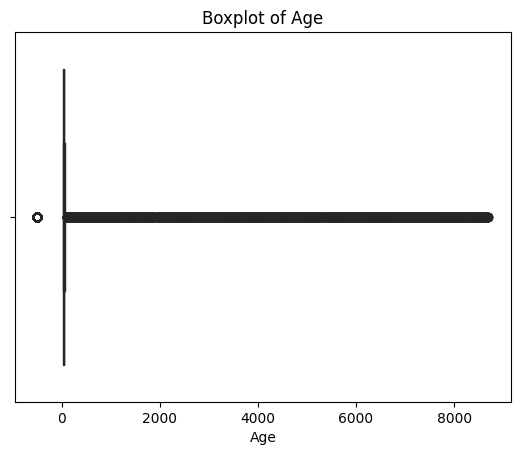

In [16]:
#lets check the outliers in the age column and remove it using IQR method

sns.boxplot(x=df['Age'], orient='h', color='green')
plt.title('Boxplot of Age')
plt.show()


In [17]:
#using IQR method to remove the otliers

Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)

IQR = Q3-Q1
upper_range = Q3+1.5*IQR
lower_range = Q1-1.5*IQR

df = df[(df['Age']>=lower_range)&(df['Age']<=upper_range)]


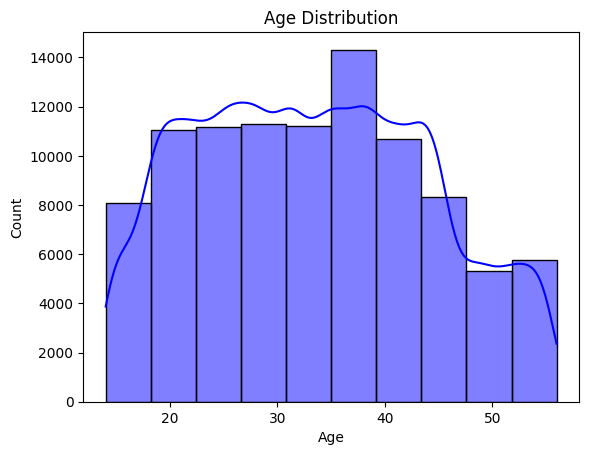

In [18]:
#checking the distribution in the age

sns.histplot(df['Age'], bins = 10 , kde = True , color = 'blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

In [19]:
df.shape

(97219, 22)

In [20]:
#checking the occupation column
df.Occupation.value_counts()

_______          6872
Lawyer           6389
Architect        6175
Engineer         6171
Scientist        6113
Accountant       6110
Mechanic         6099
Media_Manager    6068
Teacher          6049
Developer        6031
Entrepreneur     6014
Doctor           5915
Journalist       5906
Manager          5806
Musician         5760
Writer           5741
Name: Occupation, dtype: int64

In [21]:
df['Occupation'] = df['Occupation'].replace('_______', np.nan)

In [22]:
df.Occupation.value_counts()

Lawyer           6389
Architect        6175
Engineer         6171
Scientist        6113
Accountant       6110
Mechanic         6099
Media_Manager    6068
Teacher          6049
Developer        6031
Entrepreneur     6014
Doctor           5915
Journalist       5906
Manager          5806
Musician         5760
Writer           5741
Name: Occupation, dtype: int64

In [23]:
df['Occupation'].isnull().sum()

6872

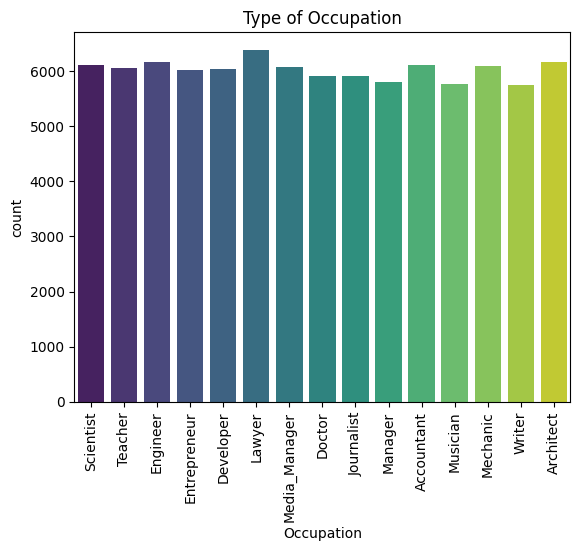

In [24]:
#plotting the distribution of occupations

sns.countplot(x= df['Occupation'], palette = 'viridis')
plt.title('Type of Occupation')
plt.xlabel('Occupation')
plt.xticks(rotation = 90)
plt.show()

In [25]:
#replacing the underscore present in the annual income column
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')

In [26]:
#channging the data type for annual income to float
df['Annual_Income'] = df['Annual_Income'].astype(float)

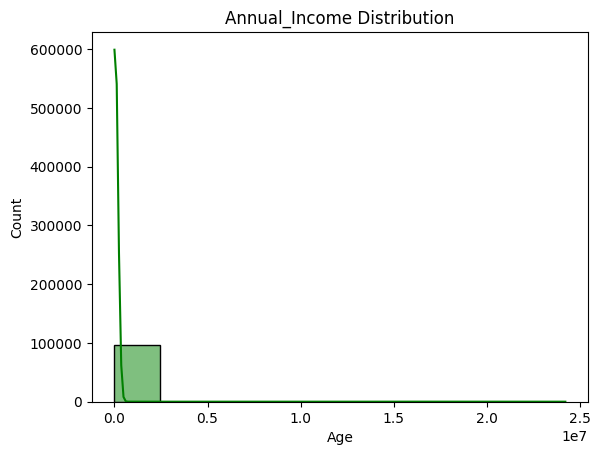

In [27]:
#checking the distribution of the annual income of the customers
sns.histplot(df['Annual_Income'], bins = 10 , kde = True , color = 'green')
plt.title('Annual_Income Distribution')
plt.xlabel('Age')
plt.show()

In [28]:
#similiary perfomring the same steps for the columns and converting their respective data types as per requirement

df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [29]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)

In [30]:
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_', '')
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

In [31]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [32]:
#replaceing gthe faulty value to null

df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [33]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

In [34]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [35]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', 'No')

#also converting the values Yes and No as 1 and 0 respectively

df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(['Yes','No'], [1,0])


In [36]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

In [37]:
df['Credit_Mix'].unique()



array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [38]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

#also converting the types in it as 1,2,0

df['Credit_Mix'] = df['Credit_Mix'].replace(['Standard','Good', 'Bad'] , (1,2,0))

In [39]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

In [40]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [41]:
##converting the values as 0,1,2
df['Credit_Score'] = df['Credit_Score'].replace(['Poor','Standard', 'Good'] , (0,1,2))

In [42]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,NaN,809.98,26.822620,0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,2.0,809.98,31.944960,0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,2.0,809.98,31.377862,0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,2.0,809.98,24.797347,0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2
5,June,23,Scientist,19114.12,NaN,3,4,3,4,8,...,4.0,2.0,809.98,27.262259,0,49.574949,62.430172,NaN,340.479212,2


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97219 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     97219 non-null  object 
 1   Age                       97219 non-null  int64  
 2   Occupation                90347 non-null  object 
 3   Annual_Income             97219 non-null  float64
 4   Monthly_Inhand_Salary     82623 non-null  float64
 5   Num_Bank_Accounts         97219 non-null  int64  
 6   Num_Credit_Card           97219 non-null  int64  
 7   Interest_Rate             97219 non-null  int64  
 8   Num_of_Loan               97219 non-null  int64  
 9   Delay_from_due_date       97219 non-null  int64  
 10  Num_of_Delayed_Payment    90395 non-null  float64
 11  Changed_Credit_Limit      95183 non-null  float64
 12  Num_Credit_Inquiries      95313 non-null  float64
 13  Credit_Mix                77588 non-null  float64
 14  Outsta

In [44]:
#checking the null values

df.isnull().sum()

Month                           0
Age                             0
Occupation                   6872
Annual_Income                   0
Monthly_Inhand_Salary       14596
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       6824
Changed_Credit_Limit         2036
Num_Credit_Inquiries         1906
Credit_Mix                  19631
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4344
Payment_Behaviour            7376
Monthly_Balance              2799
Credit_Score                    0
dtype: int64

In [45]:
#to fill the null values we will use ffill and bfill method

df = df.fillna(method = 'ffill')
df = df.fillna(method = 'bfill')

df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [46]:
#We will use Feature Transformation for the categorical features using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#there are three categorical column excluding the Credit_Score which are Month, Occupation, Payment_Behaviour

df['Month'] = le.fit_transform(df['Month'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour'])

In [47]:
#As there are multiple columns which can create the issue of Multicollinearity hence we will use VIF method to select the relevant columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

column_list = []
for i in df.columns:
  if ((df[i].dtypes!= 'object') &  (i!='Credit_Score')):
    column_list.append(i)

print(column_list)


['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']


In [48]:
X = df[column_list]
vif_data = pd.DataFrame()

vif_data['Columns'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                     Columns       VIF
0                      Month  0.299876
1                        Age  0.094595
2                 Occupation  0.277682
3              Annual_Income  0.984992
4      Monthly_Inhand_Salary  0.365713
5          Num_Bank_Accounts  0.979257
6            Num_Credit_Card  0.970542
7              Interest_Rate  0.976433
8                Num_of_Loan  0.997749
9        Delay_from_due_date  0.331933
10    Num_of_Delayed_Payment  0.981681
11      Changed_Credit_Limit  0.299373
12      Num_Credit_Inquiries  0.979743
13                Credit_Mix  0.321527
14          Outstanding_Debt  0.396238
15  Credit_Utilization_Ratio  0.024515
16     Payment_of_Min_Amount  0.476357
17       Total_EMI_per_month  0.972340
18   Amount_invested_monthly  0.911362
19         Payment_Behaviour  0.310381
20           Monthly_Balance  1.000212


None of the columns value is greater than 5, so there is no presence of Multicollinearity among the columns

**MODEL BUILDING**

In [49]:
#splitting the dataset into dependent and independent columns
X = df.drop(columns ='Credit_Score')
Y = df['Credit_Score']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 78)

In [50]:
#scaling our dataset using standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [51]:
x_train.shape , x_test.shape

((77775, 21), (19444, 21))

In [52]:
#creatting a function that checks the accuracy of the different models

from sklearn.metrics import accuracy_score , mean_absolute_error , mean_squared_error

def accuracy_checker(x_test, y_test , model):
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test , y_pred)
  print('Accuracy of the model is : ', accuracy)
  print('Mean Absolute Error :', mean_absolute_error(y_test, y_pred))
  print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

In [53]:
#Using Logistic Regression to train our model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

LogisticRegression()

In [54]:
#checking the accuracy using our created function

accuracy_checker(x_test , y_test , lr)


Accuracy of the model is :  0.6198313104299527
Mean Absolute Error : 0.40680929849825137
Mean Squared Error:  0.46009051635465953


In [55]:
#Using Decision Tree to train our model

from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()
dc.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
accuracy_checker(x_test , y_test , dc)

Accuracy of the model is :  0.6958959061921416
Mean Absolute Error : 0.3220016457519029
Mean Squared Error:  0.35779674963999175


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [58]:
#getting the best parameters from the above GridSearchCV

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [59]:
best_rf_model = RandomForestClassifier(**best_params)

In [61]:
best_rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [62]:
#checking the accuracy of our model
accuracy_checker(x_test , y_test , best_rf_model)

Accuracy of the model is :  0.8027669203867517
Mean Absolute Error : 0.20103888088870603
Mean Squared Error:  0.20865048343962148





**After employing Logistic Regression, Decision Tree, and Random Forest models to predict Credit_Score bracket, we observed varying levels of accuracy. Logistic Regression demonstrated 61% accuracy, while Decision Tree provided almost 70% accuracy. However, the Random Forest model outperformed others, achieving an accuracy of 80%. Further optimizations and feature engineering could potentially enhance model performance. Overall, this project highlights the significance of model selection in addressing the classification in the credit score of the customers.**